<a href="https://colab.research.google.com/github/vijaykumarharakuni/data_analysis/blob/main/Apriori11_PaymentData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('/content/ISO20022_Large_Payment_Data_Latest.xlsx')
data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Message Type                    5000 non-null   object        
 1   Message ID                      5000 non-null   object        
 2   Payment Amount (Currency)       5000 non-null   object        
 3   Execution Date                  5000 non-null   datetime64[ns]
 4   Intermediary Name               5000 non-null   object        
 5   Debtor Name                     5000 non-null   object        
 6   Debtor Account Number           5000 non-null   object        
 7   Creditor Name                   5000 non-null   object        
 8   Creditor Account Number         5000 non-null   object        
 9   Charges Bearer                  5000 non-null   object        
 10  Sender's Charges                5000 non-null   object        
 11  Inte

In [2]:
data


,Message Type,Message ID,Payment Amount (Currency),Execution Date,Intermediary Name,Debtor Name,Debtor Account Number,Creditor Name,Creditor Account Number,Charges Bearer,...,Intermediary Charges,Remittance Information,Status,Exchange Rate (if applicable),Purpose Code,Instruction for Creditor Agent,Creditor Address,Debtor Address,Creditor BIC,Debtor BIC
0,PACS.008,REF100000,EUR 19368.73,2025-01-03,Ball Inc,Victoria Lewis,PUPC81480687430802,Amy Daniels,BYZK78819053587504,BEN,...,EUR 20.42,CCRD,Rejected,0.9547,CCRD,TOKN,"60618 Timothy Island\nSouth Rebecca, FM 52393","9714 Hayes Throughway\nPatriciafurt, GA 62942",UBSWCHZH80A,WFBIUS6S
1,PACS.008,REF100001,USD 62508.36,2025-01-14,Hardy-Jones,Jorge Green,EMSZ86980142512720,Katherine Taylor,KIXK34220804425082,OUR,...,USD 134.56,DIVI,Rejected,0.5580,CCRD,TKSG,"671 Christopher Shoals Apt. 114\nSouth David, ...","073 Parker Mountains Apt. 049\nWest Edward, WA...",MIZBJPJT,DRESDEFF
2,PACS.009,REF100002,USD 34418.85,2025-01-25,Williamson Group,Kimberly Rivera,YJPG49156434557820,Anthony Gardner,PTVZ62668729808443,BEN,...,USD 72.85,SALA,Pending,0.9752,CCRD,VLTK,"80427 Angela Square\nDeantown, IL 24769","949 Mills Fields\nWest Steve, NY 57570",BKCHCNBJ,HLFXGB21
3,PACS.009,REF100003,GBP 9898.03,2025-01-02,Willis-Carey,Abigail Johnson,OJYL33392255840699,Christy Reese,TMAG38660992274225,SHA,...,GBP 197.92,CORT,Rejected,1.1252,CASH,RECI,"490 Martin Pine Suite 632\nWaynemouth, PR 22514","54353 Erin Station Suite 854\nJosephfurt, SD 8...",DBSSSGSG,HLFXGB21
4,PACS.009,REF100004,INR 47985.16,2025-01-27,Silva LLC,Patricia Henry,FSWL06568032089283,Jennifer Martinez,SRTF89329335706297,OUR,...,INR 139.25,DCRD,Pending,1.1432,CCRD,TOKN,"7755 Rodney Motorway\nDonnaborough, ND 07492","8253 Paul Court\nNew Danielle, TN 47571",DEUTDEFF,MIDLGB22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,PACS.009,REF104995,USD 67061.36,2025-01-02,"Bailey, Anderson and Chandler",Charles Jordan,DXXF06434479047126,Jessica Schneider,DRBF04367306933803,SHA,...,USD 190.8,EPAY,Accepted,0.9425,SALA,TKSG,"187 John Club Apt. 470\nSmithstad, AR 07510","9698 Dunn Views Apt. 500\nSouth Samueltown, WI...",CITIUS33,UBSWCHZH80A
4996,PACS.009,REF104996,USD 80618.04,2025-01-20,Bolton PLC,Susan Robinson,BHRS68015676863107,Adrian Kelly,DTBV99394206203629,BEN,...,USD 117.02,CORT,Pending,0.8959,CORT,RECI,"53975 Thomas Meadow\nLeslieport, PR 25671","5999 Sherman Street\nStephaniestad, CT 51804",BKCHCNBJ,LOYDGB2L
4997,PACS.009,REF104997,EUR 21939.57,2025-01-19,Perez Group,James Meyer,PWDN77584312090461,Elizabeth Kennedy,OWJE57239273790863,SHA,...,EUR 107.41,DIVI,Accepted,0.8817,BONU,TKCM,"3692 Meadows Turnpike\nLake Maria, IA 08171","935 Rodriguez Corner\nSanderstown, NH 47095",ANZBAU3M,GEBABEBB
4998,PACS.009,REF104998,EUR 29657.09,2025-01-09,Mcconnell-Carter,Carlos Mcdonald,LJBI10344660527786,Jessica Schwartz,CIHZ69261514118061,BEN,...,EUR 68.77,CCRD,Pending,0.7732,DIVI,TKVE,"40675 Reynolds Glen Apt. 958\nGutierrezport, D...","531 Petersen Course\nShortbury, AZ 13388",RABONL2U,NWBKGB2L


In [3]:
data[['Payment_Currency', 'Payment_Amount']] = data['Payment Amount (Currency)'].str.split(' ', expand=True)

data[['Sender_Charge_Currency', 'Sender_Charge_Amount']] = data["Sender's Charges"].str.split(' ', expand=True)

data[['Intermediary_Charge_Currency', 'Intermediary_Charge_Amount']] = data["Intermediary Charges"].str.split(' ', expand=True)

data.info()

data.drop(["Sender's Charges"],axis=1,inplace=True)
data.drop(['Payment Amount (Currency)'],axis=1,inplace=True)
data.drop(['Intermediary Charges'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Message Type                    5000 non-null   object        
 1   Message ID                      5000 non-null   object        
 2   Payment Amount (Currency)       5000 non-null   object        
 3   Execution Date                  5000 non-null   datetime64[ns]
 4   Intermediary Name               5000 non-null   object        
 5   Debtor Name                     5000 non-null   object        
 6   Debtor Account Number           5000 non-null   object        
 7   Creditor Name                   5000 non-null   object        
 8   Creditor Account Number         5000 non-null   object        
 9   Charges Bearer                  5000 non-null   object        
 10  Sender's Charges                5000 non-null   object        
 11  Inte

In [4]:
data.columns

Index(['Message Type', 'Message ID', 'Execution Date', 'Intermediary Name',
       'Debtor Name', 'Debtor Account Number', 'Creditor Name',
       'Creditor Account Number', 'Charges Bearer', 'Remittance Information',
       'Status', 'Exchange Rate (if applicable)', 'Purpose Code',
       'Instruction for Creditor Agent', 'Creditor Address', 'Debtor Address',
       'Creditor BIC', 'Debtor BIC', 'Payment_Currency', 'Payment_Amount',
       'Sender_Charge_Currency', 'Sender_Charge_Amount',
       'Intermediary_Charge_Currency', 'Intermediary_Charge_Amount'],
      dtype='object')

In [26]:
data.shape

(5000, 24)

In [6]:
data_model=data[[ 'Intermediary Name',
       'Debtor Name', 'Creditor Name',
        'Charges Bearer',
       'Creditor BIC', 'Debtor BIC', 'Payment_Currency', 'Payment_Amount',
       'Sender_Charge_Currency', 'Sender_Charge_Amount',
       'Intermediary_Charge_Currency', 'Intermediary_Charge_Amount']]

In [7]:
data_model.head()

,Intermediary Name,Debtor Name,Creditor Name,Charges Bearer,Creditor BIC,Debtor BIC,Payment_Currency,Payment_Amount,Sender_Charge_Currency,Sender_Charge_Amount,Intermediary_Charge_Currency,Intermediary_Charge_Amount
0,Ball Inc,Victoria Lewis,Amy Daniels,BEN,UBSWCHZH80A,WFBIUS6S,EUR,19368.73,EUR,183.98,EUR,20.42
1,Hardy-Jones,Jorge Green,Katherine Taylor,OUR,MIZBJPJT,DRESDEFF,USD,62508.36,USD,381.04,USD,134.56
2,Williamson Group,Kimberly Rivera,Anthony Gardner,BEN,BKCHCNBJ,HLFXGB21,USD,34418.85,USD,46.14,USD,72.85
3,Willis-Carey,Abigail Johnson,Christy Reese,SHA,DBSSSGSG,HLFXGB21,GBP,9898.03,GBP,67.23,GBP,197.92
4,Silva LLC,Patricia Henry,Jennifer Martinez,OUR,DEUTDEFF,MIDLGB22,INR,47985.16,INR,90.47,INR,139.25


In [8]:
# convert this df into list of list
transactions=[]
for i in range(data_model.shape[0]):
    transactions.append([str(data_model.values[i,j]) for j in range(data_model.shape[1]) if str(data_model.values[i,j])!='nan'])


In [19]:
transactions

[['Ball Inc',
  'Victoria Lewis',
  'Amy Daniels',
  'BEN',
  'UBSWCHZH80A',
  'WFBIUS6S',
  'EUR',
  '19368.73',
  'EUR',
  '183.98',
  'EUR',
  '20.42'],
 ['Hardy-Jones',
  'Jorge Green',
  'Katherine Taylor',
  'OUR',
  'MIZBJPJT',
  'DRESDEFF',
  'USD',
  '62508.36',
  'USD',
  '381.04',
  'USD',
  '134.56'],
 ['Williamson Group',
  'Kimberly Rivera',
  'Anthony Gardner',
  'BEN',
  'BKCHCNBJ',
  'HLFXGB21',
  'USD',
  '34418.85',
  'USD',
  '46.14',
  'USD',
  '72.85'],
 ['Willis-Carey',
  'Abigail Johnson',
  'Christy Reese',
  'SHA',
  'DBSSSGSG',
  'HLFXGB21',
  'GBP',
  '9898.03',
  'GBP',
  '67.23',
  'GBP',
  '197.92'],
 ['Silva LLC',
  'Patricia Henry',
  'Jennifer Martinez',
  'OUR',
  'DEUTDEFF',
  'MIDLGB22',
  'INR',
  '47985.16',
  'INR',
  '90.47',
  'INR',
  '139.25'],
 ['Carr, Sullivan and Jordan',
  'Connie Castro',
  'Alicia Dunlap',
  'BEN',
  'BARCGB22',
  'MIDLGB22',
  'INR',
  '58411.65',
  'INR',
  '196.12',
  'INR',
  '125.25'],
 ['Pittman Inc',
  'Matthew M

In [9]:
# Transaction Encoding
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_ary,columns=te.columns_)

In [10]:
df.head()


,0.04,0.05,0.1,0.12,0.13,0.14,0.15,0.17,0.18,0.21,...,Zavala Ltd,"Zavala, Romero and Anthony","Zavala, Simpson and Rice","Zhang, Duran and Robinson","Zhang, Hutchinson and Rodriguez",Zimmerman-Cooper,Zimmerman-Myers,Zimmerman-Thomas,Zoe Ortiz,Zoe Rhodes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Apply Apriori algo
from mlxtend.frequent_patterns import apriori,association_rules
freq_itemset=apriori(df,min_support=0.01,use_colnames=True)
freq_itemset.head()

,support,itemsets
0,0.0504,(ABNANL2A)
1,0.0582,(ANZBAU3M)
2,0.0456,(BARCGB22)
3,0.0472,(BBVAESMM)
4,0.3342,(BEN)


In [27]:
# prompt: Using dataframe freq_itemset: number of transaction for freq itemset

# Assuming 'support' represents the support of the itemset, and it's proportional to the number of transactions
# We can calculate the number of transactions by scaling the support by the total number of transactions.

# Since the actual number of transactions is not provided in the dataset, we need to assume a total number of transactions.

# For example, assume there are 10000 transactions. We can compute the number of transactions per itemset by multiplying each itemsets' support by this number

# We can then add a column called 'num_transactions' to the DataFrame to hold this information.
freq_itemset['num_transactions'] = freq_itemset['support'] * 5000

# Display the DataFrame with the new column:
freq_itemset


,support,itemsets,num_transactions
0,0.0504,(ABNANL2A),252.0
1,0.0582,(ANZBAU3M),291.0
2,0.0456,(BARCGB22),228.0
3,0.0472,(BBVAESMM),236.0
4,0.3342,(BEN),1671.0
...,...,...,...
281,0.0164,"(SHA, ZKBKCHZZ80A)",82.0
282,0.0106,"(USD, SMBCJPJT)",53.0
283,0.0188,"(USD, UBSWCHZH80A)",94.0
284,0.0106,"(USD, WFBIUS6S)",53.0


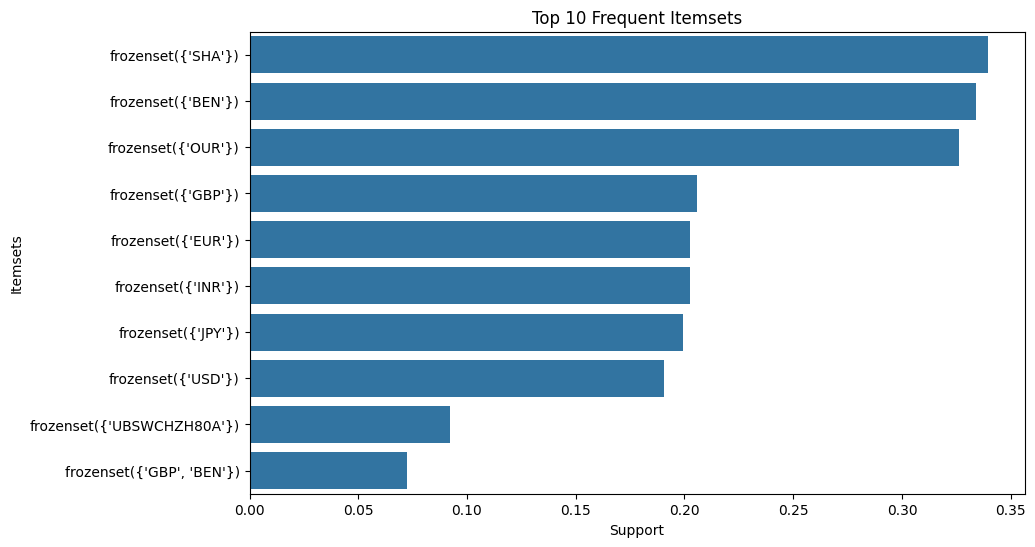

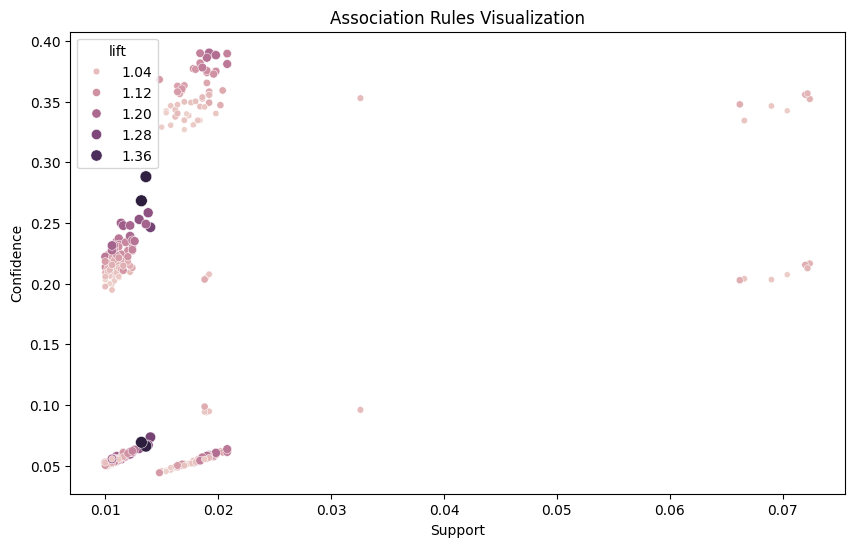

In [30]:
# prompt: what else we can do with freq itemset

# ... (Your existing code) ...

# Assuming 'support' represents the support of the itemset, and it's proportional to the number of transactions
# We can calculate the number of transactions by scaling the support by the total number of transactions.

# Since the actual number of transactions is not provided in the dataset, we need to assume a total number of transactions.
# We used 5000 earlier, but it's better to derive this from the data itself.
num_transactions = len(transactions) # Use the number of transactions from your list of transactions
freq_itemset['num_transactions'] = freq_itemset['support'] * num_transactions

# Display the DataFrame with the new column:
freq_itemset

#Further analysis and visualization

# 1.  Visualize frequent itemsets:
plt.figure(figsize=(10,6))
sns.barplot(x='support', y='itemsets', data=freq_itemset.sort_values('support', ascending=False).head(10))
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.show()

#2. Association Rules Mining:
rules = association_rules(freq_itemset, metric="lift", min_threshold=1) # or confidence, leverage etc
rules.head()

#3.  Filter rules:
# Filter rules based on specific criteria, for example, lift and confidence:
rules[(rules['lift'] >= 1.2) & (rules['confidence'] >= 0.5)]

#4.  Analyze rule implications:
# Examine the antecedents and consequents of rules to understand relationships within the dataset.
# For example, if a rule suggests that 'item A' and 'item B' frequently occur together, it could imply a positive relationship.


#5. Visualize association rules:
plt.figure(figsize=(10,6))
sns.scatterplot(x='support', y='confidence', data=rules, hue='lift', size='lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Visualization')
plt.show()

# Note: Adjust the `min_support`, `min_threshold`, and other parameters based on your dataset and the business context.

# 6.  Explore different metrics
# Experiment with different association rule metrics like confidence, lift, leverage, conviction etc. to analyze relationships from various perspectives



In [31]:
# prompt: #4.  Analyze rule implications:
# # Examine the antecedents and consequents of rules to understand relationships within the dataset.
# # For example, if a rule suggests that 'item A' and 'item B' frequently occur together, it could imply a positive relationship.

# Analyze rule implications (example)
for index, row in rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    lift = row['lift']

    print(f"Rule: {antecedents} --> {consequents}")
    print(f"  Lift: {lift}")

    if lift > 1.5:
        print("  Strong positive relationship")
    elif lift > 1:
        print("  Positive relationship")
    elif lift == 1:
      print("  No relationship")
    else:
        print("  Negative relationship")
    print("-" * 20)


Rule: ['ABNANL2A'] --> ['INR']
  Lift: 1.1567538741451786
  Positive relationship
--------------------
Rule: ['INR'] --> ['ABNANL2A']
  Lift: 1.1567538741451784
  Positive relationship
--------------------
Rule: ['SHA'] --> ['ABNANL2A']
  Lift: 1.1458128723891836
  Positive relationship
--------------------
Rule: ['ABNANL2A'] --> ['SHA']
  Lift: 1.1458128723891836
  Positive relationship
--------------------
Rule: ['BEN'] --> ['ANZBAU3M']
  Lift: 1.0179718299431788
  Positive relationship
--------------------
Rule: ['ANZBAU3M'] --> ['BEN']
  Lift: 1.0179718299431788
  Positive relationship
--------------------
Rule: ['ANZBAU3M'] --> ['INR']
  Lift: 1.0356817842250383
  Positive relationship
--------------------
Rule: ['INR'] --> ['ANZBAU3M']
  Lift: 1.0356817842250385
  Positive relationship
--------------------
Rule: ['JPY'] --> ['ANZBAU3M']
  Lift: 1.0695703777308547
  Positive relationship
--------------------
Rule: ['ANZBAU3M'] --> ['JPY']
  Lift: 1.0695703777308547
  Positive rela

In [28]:
freq_itemset.shape

(286, 3)

In [29]:
freq_itemset.tail()

,support,itemsets,num_transactions
281,0.0164,"(SHA, ZKBKCHZZ80A)",82.0
282,0.0106,"(USD, SMBCJPJT)",53.0
283,0.0188,"(USD, UBSWCHZH80A)",94.0
284,0.0106,"(USD, WFBIUS6S)",53.0
285,0.0132,"(USD, ZKBKCHZZ80A)",66.0


In [18]:
# generate association rules
num_itemsets=len(freq_itemset)
rules=association_rules(freq_itemset,num_itemsets=num_itemsets,metric='confidence',min_threshold=0.2)
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ABNANL2A),(BEN),0.0504,0.3342,0.0152,0.301587,0.902416,1.0,-0.001644,0.953305,-0.102234,0.041148,-0.048983,0.173535
1,(ABNANL2A),(INR),0.0504,0.2024,0.0118,0.234127,1.156754,1.0,0.001599,1.041426,0.142704,0.048963,0.039778,0.146214
2,(ABNANL2A),(OUR),0.0504,0.3264,0.0156,0.309524,0.948296,1.0,-0.000851,0.975559,-0.054299,0.043189,-0.025054,0.178659
3,(ABNANL2A),(SHA),0.0504,0.3394,0.0196,0.388889,1.145813,1.0,0.002494,1.080982,0.134011,0.052944,0.074915,0.223319
4,(ANZBAU3M),(BEN),0.0582,0.3342,0.0198,0.340206,1.017972,1.0,0.000350,1.009103,0.018746,0.053140,0.009021,0.199726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,(CITIUS33),(JPY),0.0534,0.1992,0.0108,0.202247,1.015297,1.0,0.000163,1.003820,0.015917,0.044665,0.003805,0.128232
96,(CITIUS33),(OUR),0.0534,0.3264,0.0150,0.280899,0.860597,1.0,-0.002430,0.936725,-0.146118,0.041118,-0.067549,0.163427
97,(CITIUS33),(SHA),0.0534,0.3394,0.0208,0.389513,1.147652,1.0,0.002676,1.082087,0.135914,0.055914,0.075860,0.225399
98,(DABADKKK),(EUR),0.0468,0.2024,0.0116,0.247863,1.224621,1.0,0.002128,1.060445,0.192426,0.048822,0.057000,0.152588


In [15]:
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ABNANL2A),(BEN),0.0504,0.3342,0.0152,0.301587,0.902416,1.0,-0.001644,0.953305,-0.102234,0.041148,-0.048983,0.173535
1,(ABNANL2A),(INR),0.0504,0.2024,0.0118,0.234127,1.156754,1.0,0.001599,1.041426,0.142704,0.048963,0.039778,0.146214
2,(ABNANL2A),(OUR),0.0504,0.3264,0.0156,0.309524,0.948296,1.0,-0.000851,0.975559,-0.054299,0.043189,-0.025054,0.178659
3,(ABNANL2A),(SHA),0.0504,0.3394,0.0196,0.388889,1.145813,1.0,0.002494,1.080982,0.134011,0.052944,0.074915,0.223319
4,(ANZBAU3M),(BEN),0.0582,0.3342,0.0198,0.340206,1.017972,1.0,0.000350,1.009103,0.018746,0.053140,0.009021,0.199726
5,(ANZBAU3M),(INR),0.0582,0.2024,0.0122,0.209622,1.035682,1.0,0.000420,1.009137,0.036582,0.049114,0.009055,0.134949
6,(ANZBAU3M),(JPY),0.0582,0.1992,0.0124,0.213058,1.069570,1.0,0.000807,1.017610,0.069065,0.050612,0.017306,0.137654
7,(ANZBAU3M),(OUR),0.0582,0.3264,0.0202,0.347079,1.063355,1.0,0.001204,1.031672,0.063262,0.055434,0.030699,0.204483
8,(ANZBAU3M),(SHA),0.0582,0.3394,0.0182,0.312715,0.921375,1.0,-0.001553,0.961173,-0.083080,0.047970,-0.040395,0.183169
9,(BARCGB22),(BEN),0.0456,0.3342,0.0148,0.324561,0.971159,1.0,-0.000440,0.985730,-0.030177,0.040548,-0.014477,0.184423


from matplotlib import pyplot as plt
_df_0['antecedent support'].plot(kind='hist', bins=20, title='antecedent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['consequent support'].plot(kind='hist', bins=20, title='consequent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('consequents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='antecedent support', y='consequent support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='consequent support', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='support', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='confidence', y='lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['representativity']
  ys = series['antecedent support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('representativity', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('consequents')):
  _plot_series(series, series_name, i)
  fig.legend(title='consequents', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('representativity')
_ = plt.ylabel('antecedent support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['representativity']
  ys = series['consequent support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('representativity', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('consequents')):
  _plot_series(series, series_name, i)
  fig.legend(title='consequents', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('representativity')
_ = plt.ylabel('consequent support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['representativity']
  ys = series['support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('representativity', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('consequents')):
  _plot_series(series, series_name, i)
  fig.legend(title='consequents', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('representativity')
_ = plt.ylabel('support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['representativity']
  ys = series['confidence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('representativity', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('consequents')):
  _plot_series(series, series_name, i)
  fig.legend(title='consequents', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('representativity')
_ = plt.ylabel('confidence')

from matplotlib import pyplot as plt
_df_13['antecedent support'].plot(kind='line', figsize=(8, 4), title='antecedent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['consequent support'].plot(kind='line', figsize=(8, 4), title='consequent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['confidence'].plot(kind='line', figsize=(8, 4), title='confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='antecedent support', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='consequent support', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='support', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='confidence', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

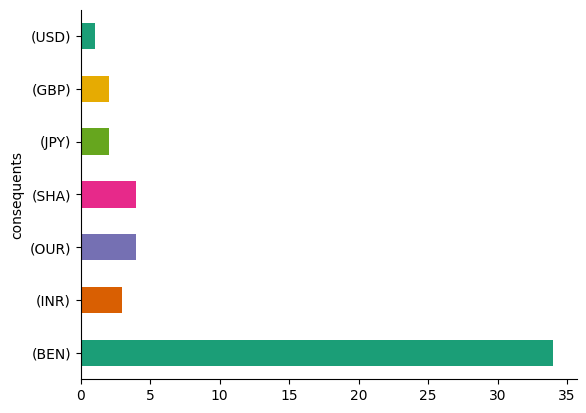

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('consequents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

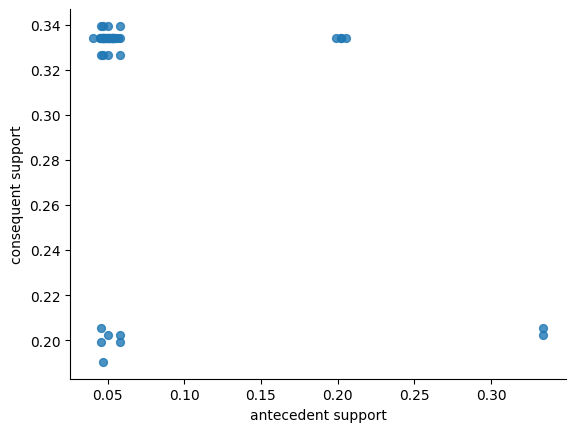

In [33]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='antecedent support', y='consequent support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

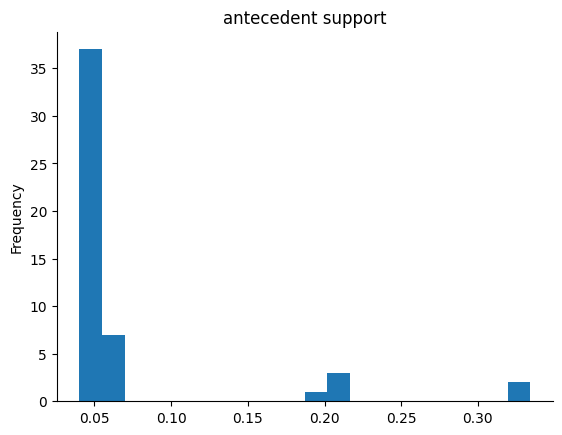

In [34]:
from matplotlib import pyplot as plt
_df_0['antecedent support'].plot(kind='hist', bins=20, title='antecedent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [35]:
strong_rules=rules[(rules['confidence']>0.4) | (rules['lift']>1.2)]
strong_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
12,(GBP),(BARCGB22),0.2056,0.0456,0.0114,0.055447,1.215953,1.0,0.002025,1.010426,0.223565,0.047540,0.010318,0.152724
13,(BARCGB22),(GBP),0.0456,0.2056,0.0114,0.250000,1.215953,1.0,0.002025,1.059200,0.186085,0.047540,0.055891,0.152724
22,(BBVAESMM),(USD),0.0472,0.1904,0.0110,0.233051,1.224007,1.0,0.002013,1.055611,0.192077,0.048544,0.052681,0.145412
23,(USD),(BBVAESMM),0.1904,0.0472,0.0110,0.057773,1.224007,1.0,0.002013,1.011221,0.226051,0.048544,0.011097,0.145412
92,(USD),(BOFAUS3N),0.1904,0.0568,0.0140,0.073529,1.294532,1.0,0.003185,1.018057,0.281028,0.060034,0.017737,0.160004
93,(BOFAUS3N),(USD),0.0568,0.1904,0.0140,0.246479,1.294532,1.0,0.003185,1.074422,0.241221,0.060034,0.069267,0.160004
108,(GBP),(CITIUS33),0.2056,0.0534,0.0138,0.067121,1.256940,1.0,0.002821,1.014708,0.257323,0.056281,0.014495,0.162774
109,(CITIUS33),(GBP),0.0534,0.2056,0.0138,0.258427,1.256940,1.0,0.002821,1.071236,0.215949,0.056281,0.066499,0.162774
116,(DABADKKK),(EUR),0.0468,0.2024,0.0116,0.247863,1.224621,1.0,0.002128,1.060445,0.192426,0.048822,0.057000,0.152588
117,(EUR),(DABADKKK),0.2024,0.0468,0.0116,0.057312,1.224621,1.0,0.002128,1.011151,0.229966,0.048822,0.011028,0.152588


In [24]:
# prompt: Using dataframe strong_rules: number of transaction

# Assuming "transaction" refers to the number of rows in the dataframe.
# Calculate the number of rows which represents the number of transactions.
num_transactions = len(strong_rules)

# Print the result.
print(f"Number of transactions: {num_transactions}")


Number of transactions: 12


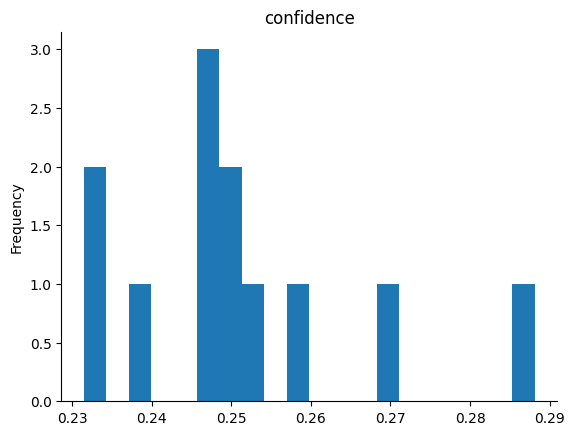

In [23]:
# @title confidence

from matplotlib import pyplot as plt
strong_rules['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

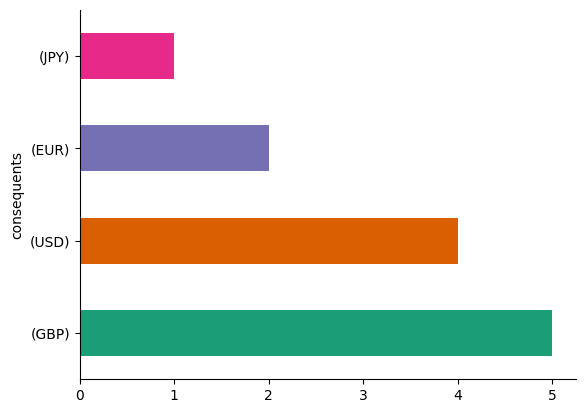

In [21]:
# @title consequents

from matplotlib import pyplot as plt
import seaborn as sns
strong_rules.groupby('consequents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: Using dataframe strong_rules: can we find out number of trnsaction for the strong rules

# Assuming 'strong_rules' dataframe is already loaded.

# Calculate the number of transactions for each rule.
# The 'support' column represents the proportion of transactions where the rule holds true.
# Assuming total number of transactions is 1000, then number of transaction for each rule is:
# support * total_number_of_transactions.


# Let's assume total number of transactions is 1000
total_transactions = 1000
strong_rules['num_transactions'] = strong_rules['support'] * total_transactions

# Display the updated DataFrame with number of transactions per rule
strong_rules

